
# A Dashboard for the GRACEFUL17 Knowledge Graph

In the following, we provide an overview of the data from the **GRACEFUL17** project (Global Governance, Local Dynamics. Transnational Regimes of Grace in the Roman Dataria Apostolica (17th Century)) (https://graceful17.hypotheses.org), witch is financed by the by *Deutsche Forschungsgemeinschaft* (DFG) under Grant 510246510 and the *Agence nationale de la recherche* (ANR) as part of the Appel à projets franco-allemand en sciences humaines et sociales under Grant ANR-22-FRAL-0010. The project is jointly directed by Olivier Poncet (École nationale des chartes, Paris) and Birgit Emich (Goethe University Frankfurt), with Bruno Boute (Goethe University Frankfurt) as the principal investigator. The Digital Humanities component is led by Jörg Hörnschmeyer (German Historical Institute Rome) and Christoph Sander (German Historical Institute Rome).

GRACEFUL17 aims to study papal provisions of ecclesiastical offices, mainly benefices, in the modern era from a global perspective. Combining classical paleographric skills and new competences derived by Digital Humanities, the team project has built an Ontology(see https://doi.org/10.5281/zenodo.17420005 and https://dhi-roma.github.io/grace-ontology/docs/widoco/doc/index.html), based on collecting and modelling data in the Archivio Apostolico Vaticano. Here, we can't provide a detailed explication about how we structured the collected data. However, a data paper is provided, which can guide scholars in our work and show possibilities to exploite our data for theirs owns research. The goal of this dashboard is to give an overview of our work thanks to an application (https://dataria.org/) via some SPARQL queries.  


## Contributors

This notebook was created by (see contributor list below):


*   Queries: [Christoph Sander](https://orcid.org/0000-0003-4452-0107), [Naomi Beutler](https://orcid.org/0009-0005-1361-5092), [Filippo Sarra](https://orcid.org/0009-0009-4366-4011), [Valentino Verdone](https://orcid.org/0009-0000-7424-5770)
*   Explanations: [Christoph Sander](https://orcid.org/0000-0003-4452-0107), [Naomi Beutler](https://orcid.org/0009-0005-1361-5092), [Filippo Sarra](https://orcid.org/0009-0009-4366-4011), [Valentino Verdone](https://orcid.org/0009-0000-7424-5770)
*   Visuals: [Christoph Sander](https://orcid.org/0000-0003-4452-0107), [Naomi Beutler](https://orcid.org/0009-0005-1361-5092)

---



The contributors listed in the following query worked on this dataset, its collection, processing, curation, and the design of the database and knowledge graph (using [CRediT](http://credit.niso.org/)).

# Imports

In [ ]:
# @title
!pip install dataria==0.4.2 itables -qqq

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.9/566.9 kB 37.7 MB/s eta 0:00:00


In [ ]:
import dataria, itables
from matplotlib import pyplot as plt
import seaborn as sns
itables.init_notebook_mode()
endpoint_url="https://graph.dhi-roma.it/query"

## Contributors to the dataset

In [ ]:
sparql_contributors = """
PREFIX schema: <https://schema.org/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
SELECT DISTINCT ?contributor_name ?ORCID (GROUP_CONCAT(DISTINCT ?label; SEPARATOR = " & ") AS ?credits) WHERE {
  ?contribution a schema:Role; owl:sameAs ?credit; schema:name ?label; ^schema:role ?contributor.
  ?contributor schema:name ?contributor_name.
  OPTIONAL {?contributor schema:sameAs ?ORCID.}
} GROUP BY ?contributor_name ?ORCID
ORDER BY (?contributor_name)
"""

In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_contributors)

Loading ITables v2.5.2 from the internet... (need help?)


## Sources and Archives



The project GRACEFUL17 focusses on two latin manuscripts belonging to the *Expeditiones* serie which pertains to the Dataria dicastery in the Vatican Archive. These sources from the 17th century contains some resumes of *graces* mainly apostolic provisions. The first query displays all the sources concerning apostolic grace in our knowledge graph (even beyond the Dataria dicastery): the first column return the number of entries, in the second one the the name of the archive, and in the last the name of the sources.

In [ ]:
sparql_entries_per_source_and_archive = """
# SPARQL query: number of entries per source and archive
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://w3id.org/grace/ontology/>
SELECT DISTINCT (COUNT(DISTINCT ?ENTRY) AS ?ENTRY) ?ARCHIVE ?SOURCE WHERE {
  ?ENTRY rdf:type grace:entry;
    grace:called ?ENTRY_label;
    grace:in_source ?SOURCE_IRI.
  ?SOURCE_IRI rdf:type grace:source;
    grace:called ?SOURCE;
    grace:in_archive ?ARCHIVE_IRI.
  ?ARCHIVE_IRI rdf:type grace:archive;
    grace:called ?ARCHIVE.
}
GROUP BY ?ARCHIVE_IRI ?ARCHIVE ?SOURCE_IRI ?SOURCE
ORDER BY DESC (?ENTRY)
"""

In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_entries_per_source_and_archive)

Loading ITables v2.5.2 from the internet... (need help?)


All the sources in the dataset belonging to the Archivio Apostolico Vaticano

In [ ]:
sparql_entries_per_source_Dataria_Apostolica = """
# SPARQL query: number of entries per source Dataria Apostolica
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
SELECT DISTINCT (COUNT(DISTINCT ?ENTRY_9) AS ?ENTRY) ?ARCHIVE ?SOURCE WHERE {
  ?EVENT_1 rdf:type grace:event;
    grace:event_related_to_object ?OBJECT_2.
  ?OBJECT_2 rdf:type grace:object.
  FILTER(NOT EXISTS {
    ?EVENT_1 grace:executor ?PERSON.
    ?PERSON rdf:type grace:person;
      grace:called ?PERSON_label.
  })
  ?EVENT_1 grace:type_of_event ?TYPE_6.
  VALUES ?TYPE_6 {
    g17:type_1
    g17:type_1332
    g17:type_1105
  }
  ?EVENT_1 grace:testified_by ?ENTRY_9.
  ?ENTRY_9 rdf:type grace:entry;
    grace:called ?ENTRY_9_label;
    grace:in_source ?SOURCE_IRI.
  ?SOURCE_IRI rdf:type grace:source;
    grace:called ?SOURCE;
    grace:in_archive ?ARCHIVE_IRI.
  ?ARCHIVE_IRI grace:called ?ARCHIVE.
  VALUES ?ARCHIVE_IRI {
    g17:archive_1
  }
}
GROUP BY ?PERSON ?PERSON_label ?ARCHIVE_IRI ?ARCHIVE ?SOURCE_IRI ?SOURCE
ORDER BY DESC (?ENTRY)
"""


In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_entries_per_source_Dataria_Apostolica)

Loading ITables v2.5.2 from the internet... (need help?)


In the next query we specify the number of entries for *Expeditiones* volumes number 2 (1622/23) and 9 (1677/78), which represent the core of the data. In the first column we present the number of entries per sources, and in the second column the name of the sources. Both sources are accessible at the Archivio Apostolico Vaticano.

In [ ]:
sparql_entries_per_source_Expedit_nine_and_two = """
# SPARL query: number of entries per year and source Expedit. 9 and 2
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
PREFIX g17raw: <https://g17.dhi-roma.it/raw/>
SELECT DISTINCT (COUNT(DISTINCT ?EVENT_1) AS ?EVENT) ?SOURCE ?ARCHIVE ?YEAR WHERE {
  ?EVENT_1 rdf:type grace:event;
    grace:called ?EVENT_1_label;
    (grace:testified_by/grace:in_source) ?SOURCE_IRI.
  ?SOURCE_IRI grace:called ?SOURCE.
  VALUES ?SOURCE_IRI {
    g17:source_2
    g17:source_1
  }
  ?EVENT_1 grace:event_date ?DATE_6.
  ?DATE_6 rdf:type grace:date;
    g17raw:start_date_year ?YEAR.
  ?EVENT_1 (grace:testified_by/grace:in_source) ?SOURCE_8.
  ?SOURCE_8 rdf:type grace:source;
    grace:in_archive ?ARCHIVE_IRI.
  ?ARCHIVE_IRI grace:called ?ARCHIVE.
  VALUES ?ARCHIVE_IRI {
    g17:archive_1
  }
}
GROUP BY ?SOURCE_IRI ?SOURCE ?ARCHIVE_IRI ?ARCHIVE ?YEAR
ORDER BY (?YEAR)
"""



In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_entries_per_source_Expedit_nine_and_two)

Loading ITables v2.5.2 from the internet... (need help?)


## Primary Types

In our Ontology we decide to call the act of granting an apostolic provision "event", and the benefice itself "object", which we consider our core. So each event has exactly one object, but one object can have multiple relationships : for example an ecclesiastical pension is always related in some way to one previous benefice, so the object benefice is linked to the event of granting a benefice, but it is also linked to the pension, which is linked to another event, the one of granting a pension. However, to understand the next queries we need to specify that we assigned different types to the events and objects, such as "apostolic provision", "apostolic dispensation" as well as "benefice", "pension" etc. for objects. The list below indicates the number of representatives per type for both events and objects.

The first query of this section displays the number of events per primary type of event (apostolic provision, apostolic dispensation etc...)

In [ ]:
sparql_primary_types_events = """
# SPARQL query: count of events per primary type in Expedit. 2 and 9
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
SELECT DISTINCT (COUNT(DISTINCT ?EVENT_1) AS ?EVENT) ?TYPE WHERE {
  ?EVENT_1 rdf:type grace:event;
    grace:called ?EVENT;
    grace:has_main_type ?TYPE_2.
  ?TYPE_2 rdf:type grace:type;
    grace:called ?TYPE.
  ?EVENT_1 grace:testified_by ?ENTRY_4.
  ?ENTRY_4 rdf:type grace:entry;
    grace:in_source ?SOURCE_6.
  VALUES ?SOURCE_6 {
    g17:source_1
    g17:source_2
  }
}
GROUP BY ?TYPE_2 ?TYPE
"""



In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_primary_types_events)

Loading ITables v2.5.2 from the internet... (need help?)


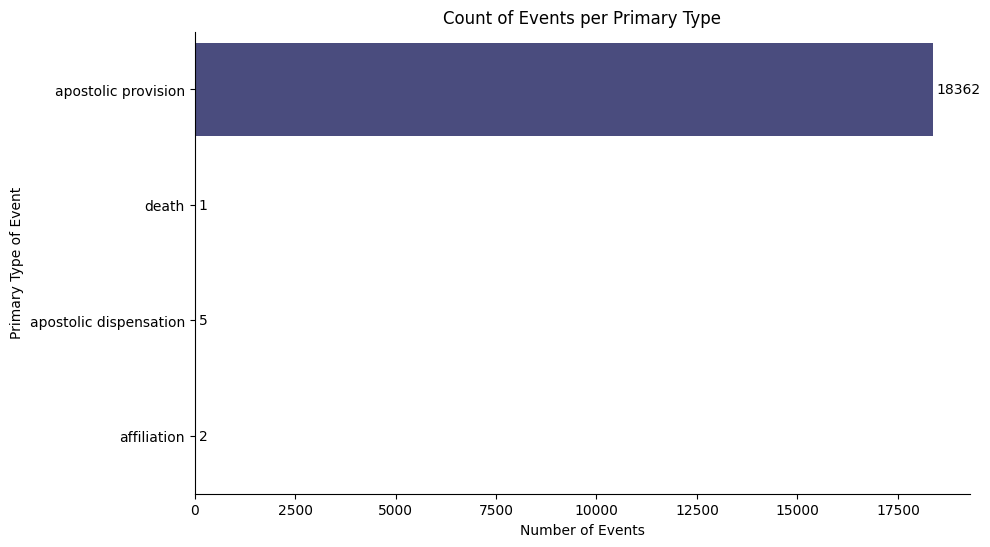

In [ ]:
sparql_primary_types_events_df = dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_primary_types_events)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=sparql_primary_types_events_df,
    x='EVENT',
    y='TYPE',
    hue='TYPE',
    palette='viridis',
    legend=False
)
plt.title('Count of Events per Primary Type')
plt.xlabel('Number of Events')
plt.ylabel('Primary Type of Event')
plt.gca().spines[['top', 'right']].set_visible(False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.show()

The following query displays the total number of objects counted per primary type in the Expedit 2 and 9 registers: in the first column will be display the number and in the second the type of object (benefice, commenda, coadjutary, indult, and pension).

In [ ]:
sparql_primary_types_objects = """
# SPARQL query: count of objects per primary type in Expedit. 2 and 9
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
SELECT DISTINCT (COUNT(DISTINCT ?OBJECT_1) AS ?OBJECT)?TYPE WHERE {
  ?OBJECT_1 rdf:type grace:object;
    grace:called ?OBJECT_1_label;
    grace:type_of_object ?TYPE_2.
  ?TYPE_2 rdf:type grace:type;
    grace:called ?TYPE.
  ?OBJECT_1 grace:object_related_to_event ?EVENT_4.
  ?EVENT_4 rdf:type grace:event;
    grace:testified_by ?ENTRY_6.
  ?ENTRY_6 rdf:type grace:entry;
    grace:in_source ?SOURCE_8.
  VALUES ?SOURCE_8 {
    g17:source_1
    g17:source_2
  }
}
GROUP BY ?TYPE_2 ?TYPE
ORDER BY DESC (?OBJECT)
"""
sparql_primary_types_objects_df=dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_primary_types_objects)

In [ ]:
sparql_primary_types_objects_df

Loading ITables v2.5.2 from the internet... (need help?)


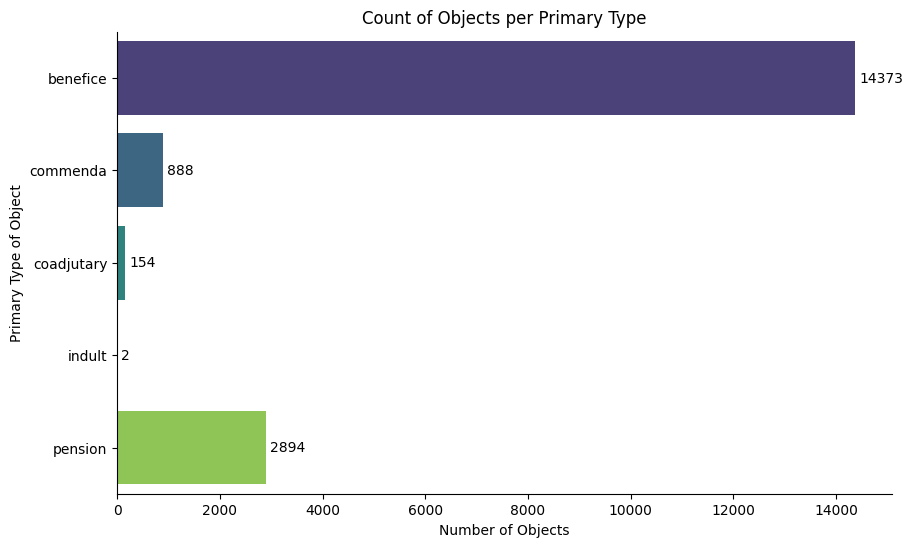

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=sparql_primary_types_objects_df,
    x='OBJECT',
    y='TYPE',
    hue='TYPE',
    palette='viridis',
    legend=False
)
plt.title('Count of Objects per Primary Type')
plt.xlabel('Number of Objects')
plt.ylabel('Primary Type of Object')
plt.gca().spines[['top', 'right']].set_visible(False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.show()

## Temporal Aggregation

The following query displays the events per year in the Expedit. 2 and 9 registers along with the respective pope under whose pontificate the decisions were made.

In [ ]:
sparql_events_per_year = """
# SPARQL query: number of events per year (Expedit. 2 and 9) and pontificate
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
PREFIX g17raw: <https://g17.dhi-roma.it/raw/>
SELECT DISTINCT (COUNT(DISTINCT ?EVENT_1) AS ?EVENT) ?DATE ?PERSON WHERE {
  ?EVENT_1 rdf:type grace:event;
    grace:called ?EVENT_1_label;
    (grace:testified_by/grace:in_source) ?SOURCE_2.
  VALUES ?SOURCE_2 {
    g17:source_1
    g17:source_2
  }
  ?EVENT_1 grace:event_date ?DATE_4.
  ?DATE_4 rdf:type grace:date;
    g17raw:start_date_year ?DATE.
  ?EVENT_1 grace:decided_by ?PERSON_8.
  ?PERSON_8 rdf:type grace:person;
    grace:called ?PERSON.
}
GROUP BY ?DATE ?PERSON_8 ?PERSON
ORDER BY (?YEAR)
"""

sparql_events_per_year_df=dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_events_per_year)

In [ ]:
sparql_events_per_year_df

Loading ITables v2.5.2 from the internet... (need help?)


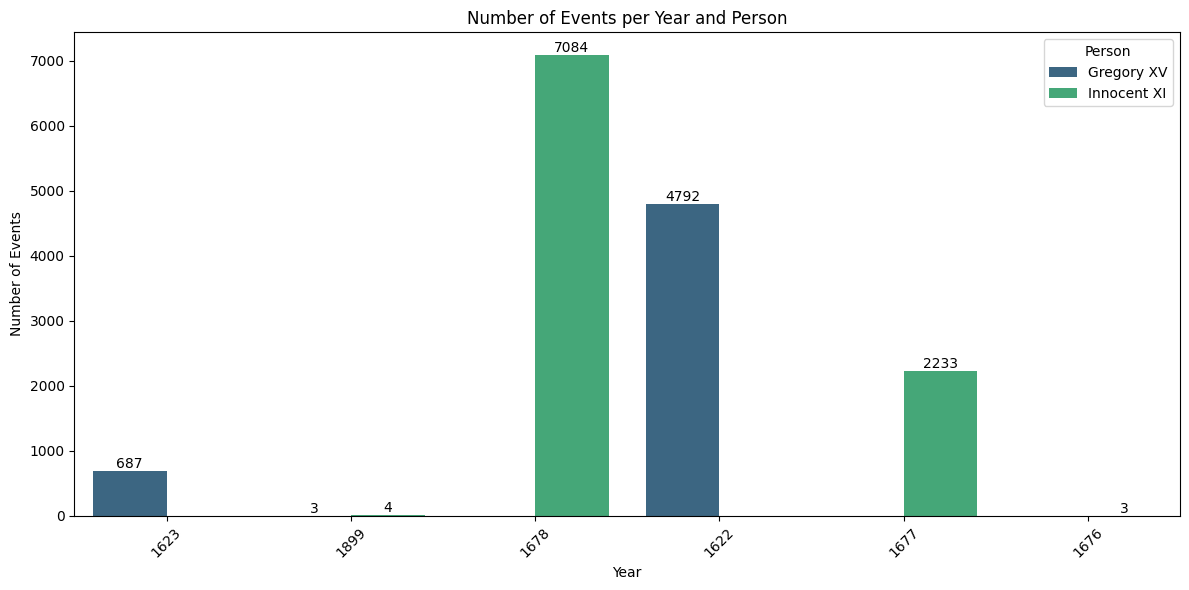

In [ ]:

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sparql_events_per_year_df, x='DATE', y='EVENT', hue='PERSON', palette='viridis')
plt.title('Number of Events per Year and Person')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Person')
plt.tight_layout()

# Add the exact number of events to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

## Ecclesiastical Provinces and Territorial Regions


Our data allows to retrieve some historical informations such as the name and number of archdioceses (and therefore ecclesiastical provinces) and dioceses of 17th century Europe. These serve as geographical reference points for our data. These areas are all the dioceses listed in the Expeditiones registers to which provisions were sent. Based on the data, we have divided these into the following regions: Italy, Spain, France, the Holy Roman Empire, the Balkans, Ireland, Eastern and Central Europe, North Africa and Asia. The following queries show the number of ecclesiastical province per region. In the first query we have the number of ecclesiastical provinces and in the second query the region.

In [ ]:
sparql_provinces_overview = """
# SPARQL query: number of ecclesiastical provinces per territorial region (Expedit. 2 and 9)
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
SELECT DISTINCT (COUNT(DISTINCT ?ECCLESIASTICAL_PROVINCE_6) AS ?ECCLESIASTICAL_PROVINCE) ?REGION WHERE {
  ?EVENT_1 rdf:type grace:event;
    grace:type_of_event g17:type_1;
    grace:event_related_to_object ?OBJECT_2.
  ?OBJECT_2 rdf:type grace:object;
    grace:in_diocese ?INSTITUTION_4.
  ?INSTITUTION_4 rdf:type grace:institution;
    (grace:under_jurisdiction+) ?ECCLESIASTICAL_PROVINCE_6.
  ?ECCLESIASTICAL_PROVINCE_6 rdf:type grace:ecclesiastical_province;
    grace:called ?ECCLESIASTICAL_PROVINCE_6_label.
  ?INSTITUTION_4 grace:primary_place ?PLACE_8.
  ?PLACE_8 rdf:type grace:place;
    (grace:falls_within+) ?REGION_IRI.
  ?REGION_IRI rdf:type grace:region;
    grace:called ?REGION.
  ?EVENT_1 (grace:testified_by/grace:in_source) ?SOURCE_11.
  VALUES ?SOURCE_11 {
    g17:source_1
    g17:source_2
  }
}
GROUP BY ?REGION_IRI ?REGION
ORDER BY DESC (?ECCLESIASTICAL_PROVINCE)
"""

sparql_provinces_overview_df=dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_provinces_overview)

In [ ]:
sparql_provinces_overview_df

Loading ITables v2.5.2 from the internet... (need help?)


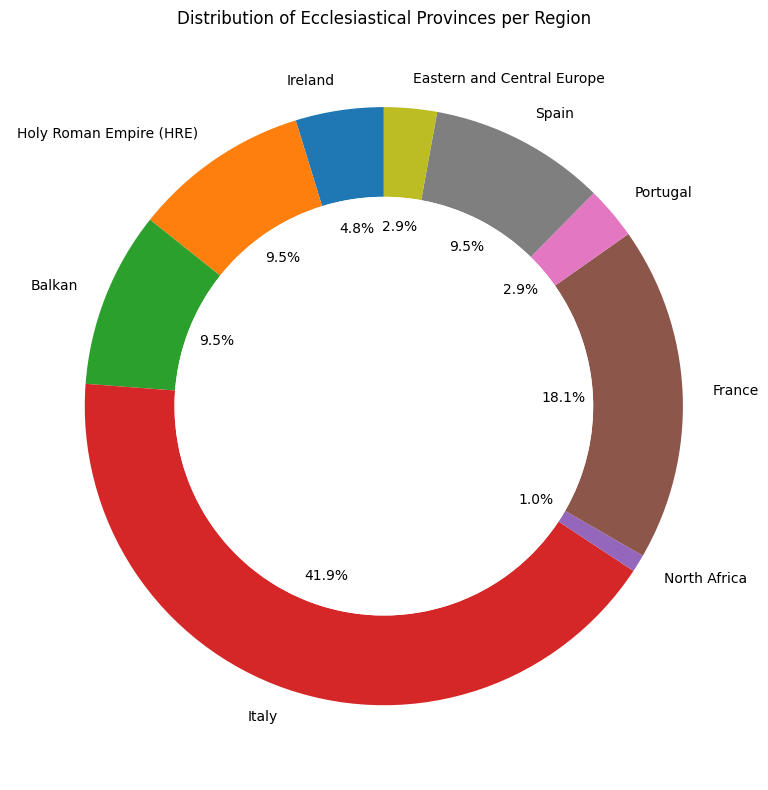

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(sparql_provinces_overview_df['ECCLESIASTICAL_PROVINCE'], labels=sparql_provinces_overview_df['REGION'], autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set_title('Distribution of Ecclesiastical Provinces per Region')
plt.tight_layout()
plt.show()

The following query allows to go deeper into what we showed before: In addition to the ecclesiastical province (i.e. the archdiocese), the query shows the dioceses located in the respective ecclesiastical provinces. These appear in the marginalia and again in the entry itself.

In [ ]:
sparql_dioceses_overview = """
# SPARQL query: number of dioceses per territorial region (Expedit. 2 and 9)
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
SELECT DISTINCT (COUNT(DISTINCT ?DIOCESE_1) AS ?DIOCESE) ?ECCLESIASTICAL_PROVINCE ?REGION WHERE {
  ?DIOCESE_1 rdf:type grace:diocese;
    grace:called ?DIOCESE_1_label;
    (grace:under_jurisdiction+) ?ECCLESIASTICAL_PROVINCE_2.
  ?ECCLESIASTICAL_PROVINCE_2 rdf:type grace:ecclesiastical_province;
    grace:called ?ECCLESIASTICAL_PROVINCE.
  ?DIOCESE_1 grace:primary_place ?PLACE_4.
  ?PLACE_4 rdf:type grace:place;
    (grace:falls_within+) ?REGION_6.
  ?REGION_6 rdf:type grace:region;
    grace:called ?REGION.
  ?DIOCESE_1 grace:holds_object ?OBJECT_8.
  ?OBJECT_8 rdf:type grace:object;
    grace:object_related_to_event ?EVENT_10.
  ?EVENT_10 rdf:type grace:event;
    grace:testified_by ?ENTRY_12.
  ?ENTRY_12 rdf:type grace:entry;
    grace:in_source ?SOURCE_14.
  VALUES ?SOURCE_14 {
    g17:source_1
    g17:source_2
  }
}
GROUP BY ?ECCLESIASTICAL_PROVINCE_2 ?ECCLESIASTICAL_PROVINCE ?REGION_6 ?REGION
ORDER BY (?DIOCESE)
"""


In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_dioceses_overview)

Loading ITables v2.5.2 from the internet... (need help?)


The next query diplays the number of places per region. With places we refer to cities or any human settlement we identified in the Expedit.2 and 9 registers. These are usually the location (primary place) of the dioceses where offices were assigned.

In [ ]:
sparql_places_overview = """
# SPARQL query: number of places per territorial region (Expedit.2 and 9)
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
SELECT DISTINCT (COUNT(DISTINCT ?PLACE_1) AS ?PLACE) ?REGION WHERE {
  ?PLACE_1 rdf:type grace:place;
    grace:called ?PLACE_1_label;
    (grace:falls_within+) ?REGION_2.
  ?REGION_2 rdf:type grace:region;
    grace:called ?REGION.
  ?PLACE_1 ^grace:primary_place ?INSTITUTION_4.
  ?INSTITUTION_4 rdf:type grace:institution;
    grace:holds_object ?OBJECT_6.
  ?OBJECT_6 rdf:type grace:object;
    grace:object_related_to_event ?EVENT_8.
  ?EVENT_8 rdf:type grace:event;
    (grace:testified_by/grace:in_source) ?SOURCE_10.
  VALUES ?SOURCE_10 {
    g17:source_1
    g17:source_2
  }
}
GROUP BY ?REGION_2 ?REGION
ORDER BY (?PLACE)
"""
sparql_places_overview_df=dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_places_overview)

In [ ]:
sparql_places_overview_df

Loading ITables v2.5.2 from the internet... (need help?)


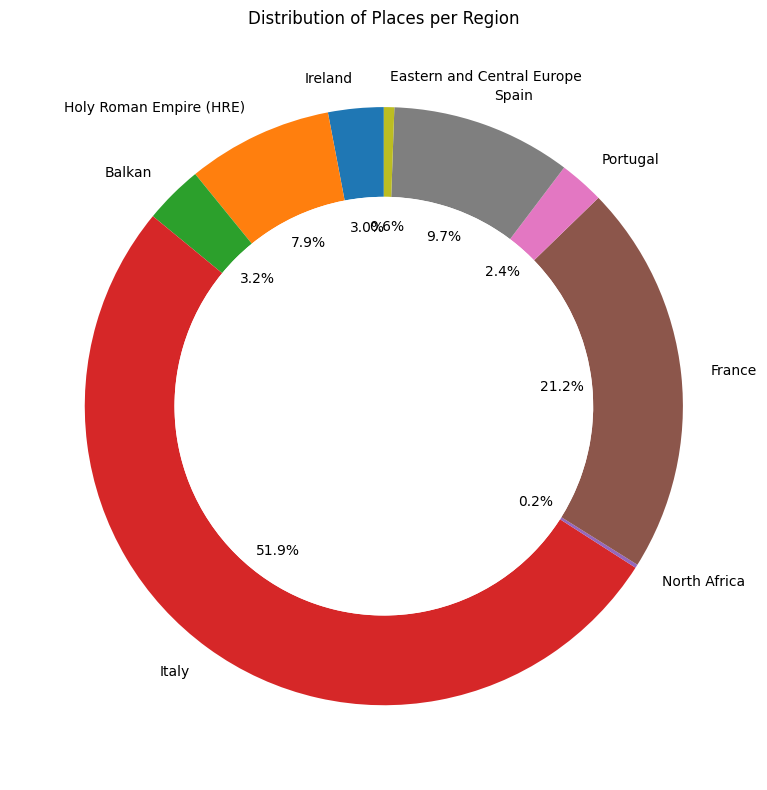

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(sparql_places_overview_df['PLACE'], labels=sparql_places_overview_df['REGION'], autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.3})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.set_title('Distribution of Places per Region')
plt.tight_layout()
plt.show()

We display all primary places (location of the seat of the bishop) linked to an institution and type of institution.

In [ ]:
sparql_geographical_location_of_the_dioceses = """
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>
SELECT DISTINCT ?MAP ?PLACE ?INSTITUTION ?TYPE WHERE {
  ?EVENT_1 rdf:type grace:event;
    grace:event_related_to_object ?OBJECT_2.
  ?OBJECT_2 rdf:type grace:object;
    grace:in_diocese ?INSTITUTION_3.
  ?INSTITUTION_3 rdf:type grace:institution;
    grace:called ?INSTITUTION;
    grace:primary_place ?PLACE_5.
  ?PLACE_5 rdf:type grace:place;
    grace:called ?PLACE;
    grace:wkt ?MAP.
  ?OBJECT_2 grace:in_diocese ?INSTITUTION_12.
  ?INSTITUTION_12 rdf:type grace:institution;
    grace:has_main_type ?TYPE_14.
  ?TYPE_14 rdf:type grace:type;
    grace:called ?TYPE.
  ?EVENT_1 grace:testified_by ?ENTRY_8.
  ?ENTRY_8 rdf:type grace:entry;
    grace:in_source ?SOURCE_10.
  VALUES ?SOURCE_10 {
    g17:source_2
    g17:source_1
  }
}
ORDER BY (?PLACE)
"""

In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_geographical_location_of_the_dioceses)

Loading ITables v2.5.2 from the internet... (need help?)


In [ ]:
explore_kwargs = {
    'cmap': 'viridis', # the color map
    'k': 15, # the number of clusters
    'scheme': 'NaturalBreaks', # the method to calculate clusters
    'cluster_weight_var': 'TYPE' # the variable to use for clustering
}

In [ ]:
dataria.GEO.explore(
    endpoint_url=endpoint_url, # as defined above
    query=sparql_geographical_location_of_the_dioceses, # as defined above
    geo_var="MAP", # the name of the variable in the query that return the coordinates
    label_var="INSTITUTION", # the query variable for label for the entity shown on the map
    **explore_kwargs  # as defined above
    )

## Ontological description of events and objects

The query shows which and how many instances of different classes are linked to Events and Objects. In other words, it identifies which instances of a given class in fact describe Events or Objects. The query calculates both the total number of such instances and, for each individual Event or Object, the minimum, maximum, and average number of linked instances. Overall, the query thus provides information on how the formal ontology has actually been applied to semantically describe Events and Objects.

In [ ]:
descriptions_per_grace = """
# SPARQL query: average number of attributes present for events
# Class Instances per Event
# Written by Christoph Sander, last modified 9. Oct 2025, 16:52

PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>

SELECT
  ?MAIN_PROPERTY
  (SUM(?descCountPerGrace) AS ?totalDescriptions)
  (MIN(?descCountPerGrace) AS ?minDescriptionsPerGrace)
  (MAX(?descCountPerGrace) AS ?maxDescriptionsPerGrace)
  (ROUND(AVG(?descCountPerGrace) * 100) / 100 AS ?avgDescriptionsPerGrace)
WHERE {
  {
    SELECT
      ?MAIN_PROPERTY
      ?PAPAL_GRACE_7
      (COUNT(DISTINCT ?DESCRIPTION_4) AS ?descCountPerGrace)
    WHERE {
      ?MAIN_PROPERTY_IRI rdf:type grace:main_property ;
                       grace:called ?MAIN_PROPERTY ;
                       ^grace:has_top_term ?MAIN_PROPERTY_2 .
      ?MAIN_PROPERTY_2 rdf:type grace:main_property ;
                       ^grace:regards ?DESCRIPTION_4 .
      ?DESCRIPTION_4 rdf:type grace:description ;
                     ^grace:described_by ?PAPAL_GRACE_7 .
      ?PAPAL_GRACE_7 rdf:type grace:papal_grace .
      FILTER(NOT EXISTS { ?MAIN_PROPERTY_IRI grace:has_top_term g17:type_173. })
    }
    GROUP BY ?MAIN_PROPERTY_IRI ?MAIN_PROPERTY ?PAPAL_GRACE_7
  }
}
GROUP BY ?MAIN_PROPERTY
ORDER BY ?MAIN_PROPERTY
"""



In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=descriptions_per_grace)

Loading ITables v2.5.2 from the internet... (need help?)


Based on an example object, the following query shows all attributes and their average number

In [ ]:
descriptions_per_object = """
# SPARQL query: average number of attributes present for events
# template query id 62
# Written by Christoph Sander, last modified 9. Oct 2025, 16:52

# Class Instances per Object
# The query shows how richly each main property is represented across immaterial objects, identifying which ones tend to be linked with many or only few instances of respective classes.
######### QUERY ##########
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://w3id.org/grace/ontology/>

SELECT
  ?MAIN_PROPERTY
  (SUM(?descCountPerObject) AS ?totalDescriptions)
  (MIN(?descCountPerObject) AS ?minDescriptionsPerObject)
  (MAX(?descCountPerObject) AS ?maxDescriptionsPerObject)
  (ROUND(AVG(?descCountPerObject) * 100) / 100 AS ?avgDescriptionsPerObject)
WHERE {
  {
    SELECT
      ?MAIN_PROPERTY
      ?OBJECT
      (COUNT(DISTINCT ?DESCRIPTION_4) AS ?descCountPerObject)
    WHERE {
      ?MAIN_PROPERTY_IRI rdf:type grace:main_property ;
                       grace:called ?MAIN_PROPERTY ;
                       ^grace:has_top_term ?MAIN_PROPERTY_2 .
      ?MAIN_PROPERTY_2 rdf:type grace:main_property ;
                       ^grace:regards ?DESCRIPTION_4 .
      ?DESCRIPTION_4 rdf:type grace:description ;
                     ^grace:described_by ?OBJECT .
      ?OBJECT rdf:type grace:immaterial_object .
      FILTER(NOT EXISTS { ?MAIN_PROPERTY_IRI grace:has_top_term g17:type_173. })
    }
    GROUP BY ?MAIN_PROPERTY_IRI ?MAIN_PROPERTY ?OBJECT
  }
}
GROUP BY ?MAIN_PROPERTY
ORDER BY ?MAIN_PROPERTY
"""

In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=descriptions_per_object)

Loading ITables v2.5.2 from the internet... (need help?)


## Ontological Classes

The overview provides a list of all ontological classes together with the number of their instances in the dataset.

In [ ]:
sparql_ontological_classes = """
# SPARQL query: all ontological classes and number of their instances
# template ID 63

# Class Count
# Written by Christoph Sander, last modified 9. Oct 2025, 16:52
# The query shows the count of instances of specific classes
######### QUERY ##########
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://w3id.org/grace/ontology/>

SELECT ?TYPE (COUNT(?instance) AS ?instanceCount)
WHERE {
  VALUES ?TYPE {
    grace:entry
    grace:object
    grace:event
    grace:person
    grace:institution
    grace:place
    grace:type
    grace:dedication
    grace:source
    grace:archive
  }
  ?instance rdf:type ?TYPE .
}
GROUP BY ?TYPE
ORDER BY DESC(?instanceCount)
"""


In [ ]:
dataria.DATA.sparql_to_dataframe(endpoint_url=endpoint_url,query=sparql_ontological_classes)

Loading ITables v2.5.2 from the internet... (need help?)
